## Saving a Cats v Dogs Model

This is a minimal example showing how to train a fastai model on Kaggle, and save it so you can use it in your app.

In [46]:
# Make sure we've got the latest version of fastai:
!pip install -Uqq fastai

First, import all the stuff we need from fastai:

In [47]:
from fastai.vision.all import *

Download and decompress our dataset, which is pictures of dogs and cats:

In [48]:
# load the picture data from the images directory
#path = untar_data('/Users/gabriel/Code/amimoji')/'images'
#path = 'fuck'
#path = untar_data('https://amimoji.s3.us-east-2.amazonaws.com/images.tgz')/'images'
path = untar_data(URLs.PETS)/'images'





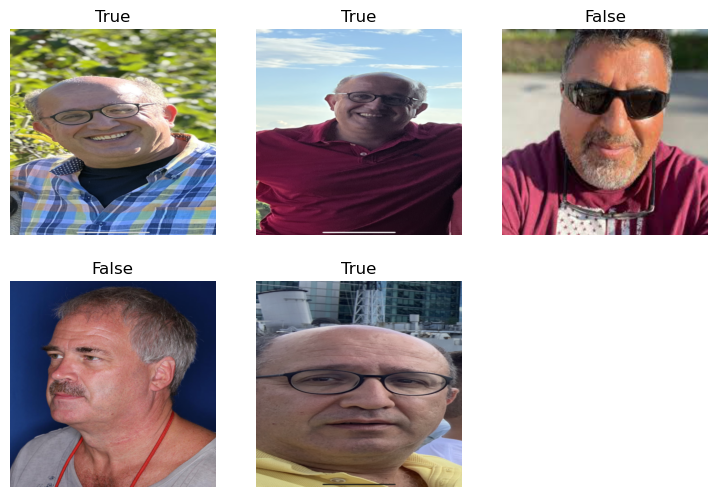

In [63]:
# show a few images from the dataset
dls = ImageDataLoaders.from_name_func(path, get_image_files(path),
                                        valid_pct=0.2, seed=42,
                                        label_func=lambda x: x[0].isupper(),
                                        item_tfms=Resize(460, method='squish', pad_mode='zeros'),
                                        #batch_tfms=aug_transforms(size=224, min_scale=0.75, ),
                                        bs=5)

dls.show_batch()

We need a way to label our images as dogs or cats. In this dataset, pictures of cats are given a filename that starts with a capital letter:

In [64]:
def is_cat(x): return x[0].isupper() 

Now we can create our `DataLoaders`:

In [66]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192),
    bs=5)

... and train our model, a resnet18 (to keep it small and fast):

In [67]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/Users/gabriel/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/gabriel/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.357244,0.653559,0.272727,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.261987,0.286128,0.090909,00:05
1,0.421817,0.123630,0.090909,00:05
2,0.417943,0.124594,0.000000,00:05


Now we can export our trained `Learner`. This contains all the information needed to run the model:

In [68]:
learn.export('mojimodel3.pkl')

Finally, open the Kaggle sidebar on the right if it's not already, and find the section marked "Output". Open the `/kaggle/working` folder, and you'll see `model.pkl`. Click on it, then click on the menu on the right that appears, and choose "Download". After a few seconds, your model will be downloaded to your computer, where you can then create your app that uses the model.